## 身份证正面信息的提取

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import pytesseract
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from skimage import io
import numpy as np
import pandas as pd
import re

### 1:图像中身份证位置的提取

身份证的正面没有人脸，所以没有办法通过人脸矫正身份证位置。

(403, 640, 3)


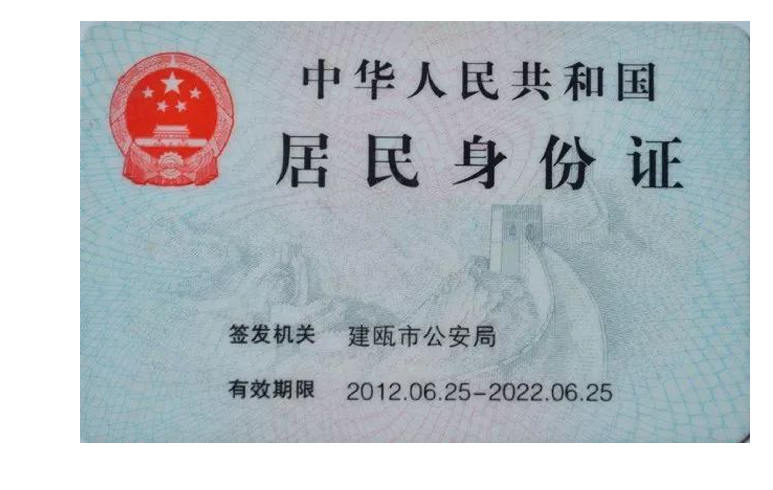

(1612, 2560, 3)


In [2]:
image = io.imread("身份证背面3.jpg")
print(image.shape)
high,width  = image.shape[0:2]
## 图像放大两倍 ，4x4像素邻域的双三次插值
image = cv2.resize(image,(width*4,high*4), interpolation=cv2.INTER_CUBIC)
plt.imshow(image)
plt.axis("off")
plt.show()
print(image.shape)

###  去除国徽的影响

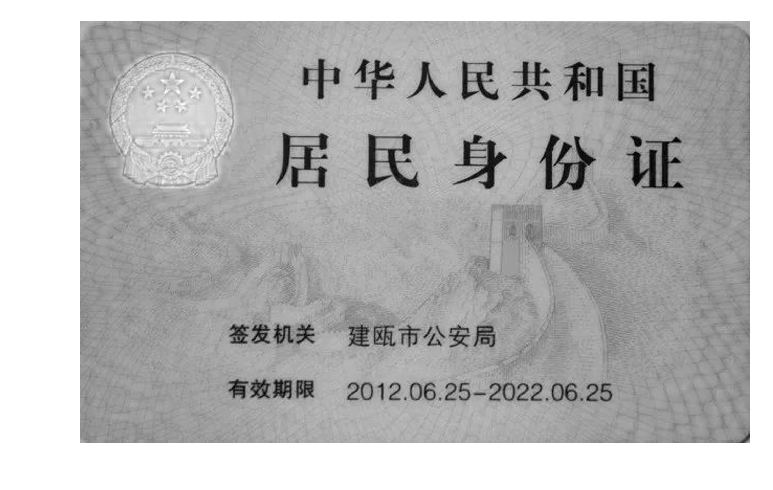

In [3]:
## 查看红色通导的图像
plt.imshow(image[:,:,0],cmap=plt.cm.gray)
plt.axis("off")
plt.show()

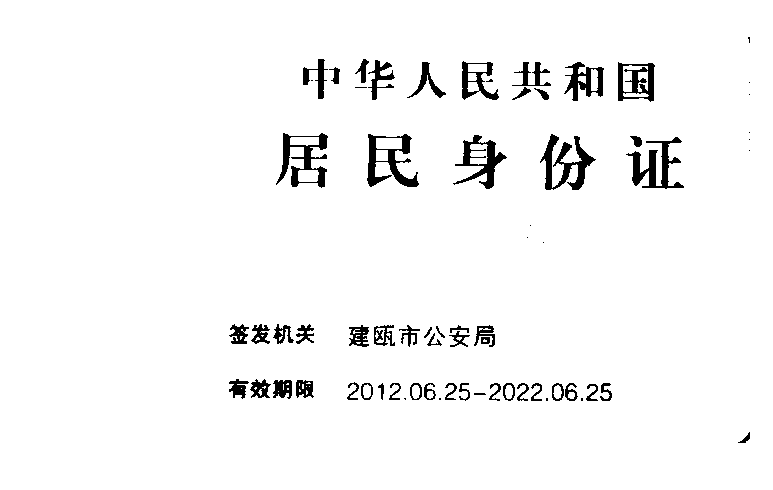

中华人民共和国
居 民身份证

签发机关 建瓯市公安局
有效期隔 2012.O6'25-2O22.06.25


In [4]:
## 对红色通道图像进行阈值化处理，可以发现阈值化处理后的图像能够去除国徽
retval, imagebin = cv2.threshold(image[:,:,0],120, 255, cv2.THRESH_OTSU + cv2.THRESH_BINARY)
plt.imshow(imagebin,cmap=plt.cm.gray)
plt.axis("off")
plt.show()
## 再次通过pytesseract库来查看检测效果，但是结果并不是很好
text = pytesseract.image_to_string(imagebin,lang='chi_sim')
print(text)

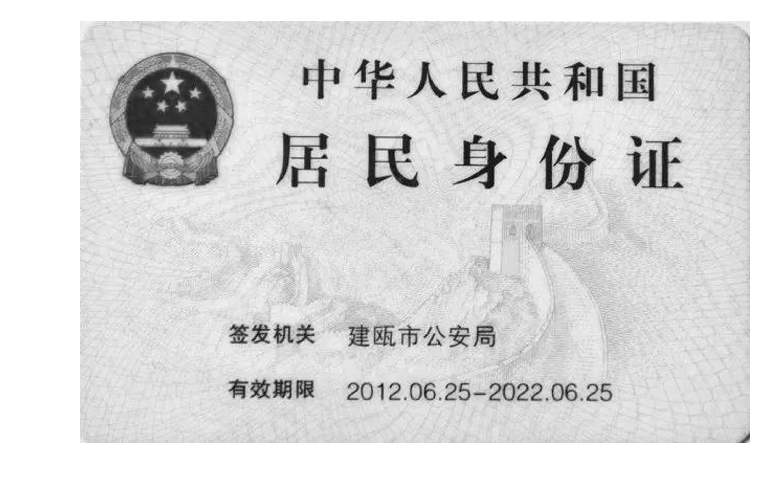

In [5]:
## 查看G
plt.imshow(image[:,:,1],cmap=plt.cm.gray)
plt.axis("off")
plt.show()

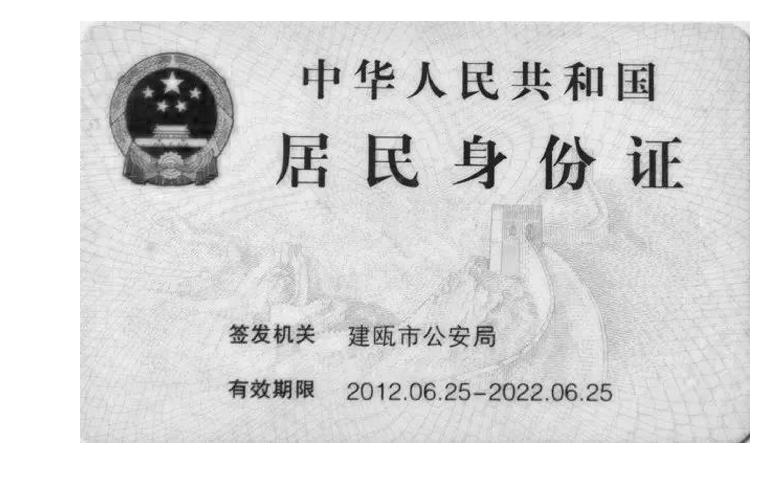

In [6]:
## 查看b
plt.imshow(image[:,:,2],cmap=plt.cm.gray)
plt.axis("off")
plt.show()

In [7]:
## 可以通过pytesseract库来查看检测效果，但是结果并不是很好
text = pytesseract.image_to_string(image,lang='chi_sim')
print(text)

签发机关 建瓯市公安局
有效期隔 2012.06.25-2022.O6.25


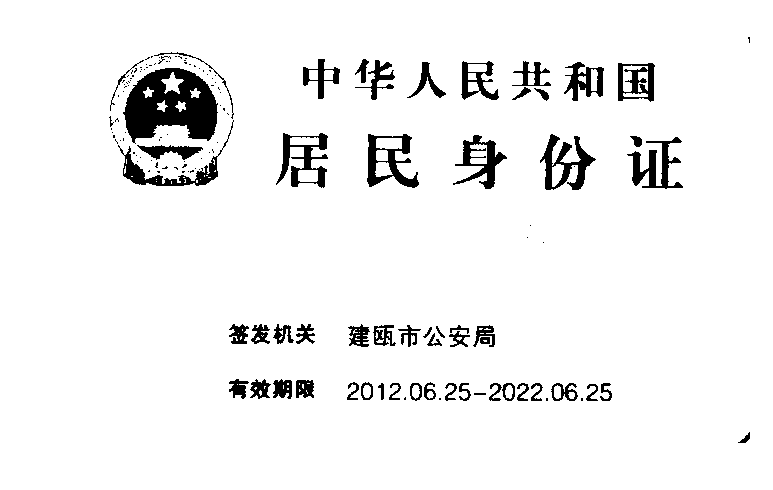

`『熹熹′"′'「〕′…′'_'′′`…′_′′`~…`〈_" 中华人民共和国
居民身份证

签发机关 建瓯市公安局
有效期隔 2012-06.25-2022.06.25


In [8]:
## 对图像进行处理，转化为灰度图像=>二值图像
imagegray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
retval, imagebin = cv2.threshold(imagegray, 120, 255, cv2.THRESH_OTSU + cv2.THRESH_BINARY)
plt.imshow(imagebin,cmap=plt.cm.gray)
plt.axis("off")
plt.show()
## 再次通过pytesseract库来查看检测效果，但是结果并不是很好
text = pytesseract.image_to_string(imagebin,lang='chi_sim')
print(text)

**可以发现，通过识别放大后的图像里的文字信息已经可以将主要的信息均识别正确了。**

In [9]:
## 提取识别的内容
textlist = text.split("\n")
textdf = pd.DataFrame({"text":textlist})
textdf["textlen"] = textdf.text.apply(len)
## 去除长度《＝1的行
textdf = textdf[textdf.textlen > 1].reset_index(drop = True)
textdf

,text,textlen
0,"`『熹熹′""′'「〕′…′'_'′′`…′_′′`~…`〈_"" 中华人民共和国",39
1,居民身份证,5
2,签发机关 建瓯市公安局,11
3,有效期隔 2012-06.25-2022.06.25,26


In [10]:
## 提取相应的信息
print("第一行:",textdf.text[0][-7:])
print("=====================")
print("第二行:",textdf.text[1][-5:])
print("=====================")
print("签发机关:",textdf.text[2].split(" ")[-1])
print("=====================")
## 提取时间信息
timetext = textdf.text[3]
timetext = re.findall("\d+",timetext)
timetext
print("有效开始时间:",".".join(timetext[0:3]))
print("=====================")
print("失效时间:",".".join(timetext[3:]))
print("=====================")

第一行: 中华人民共和国
第二行: 居民身份证
签发机关: 建瓯市公安局
有效开始时间: 2012.06.25
失效时间: 2022.06.25


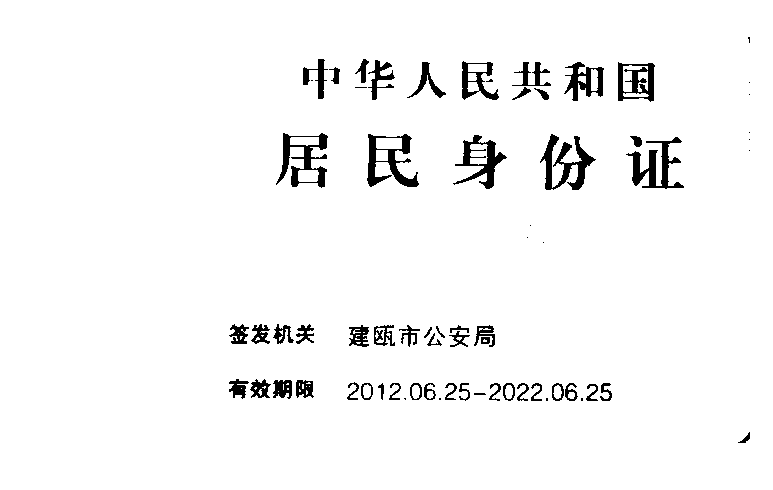

中华人民共和国
居 民身份证

签发机关 建瓯市公安局
有效期隔 2012.O6'25-2O22.06.25


In [11]:
## 对红色通道图像进行阈值化处理，可以发现阈值化处理后的图像能够去除国徽
retval, imagebin = cv2.threshold(image[:,:,0],120, 255, cv2.THRESH_OTSU + cv2.THRESH_BINARY)
plt.imshow(imagebin,cmap=plt.cm.gray)
plt.axis("off")
plt.show()
## 再次通过pytesseract库来查看检测效果，但是结果并不是很好
text = pytesseract.image_to_string(imagebin,lang='chi_sim')
print(text)

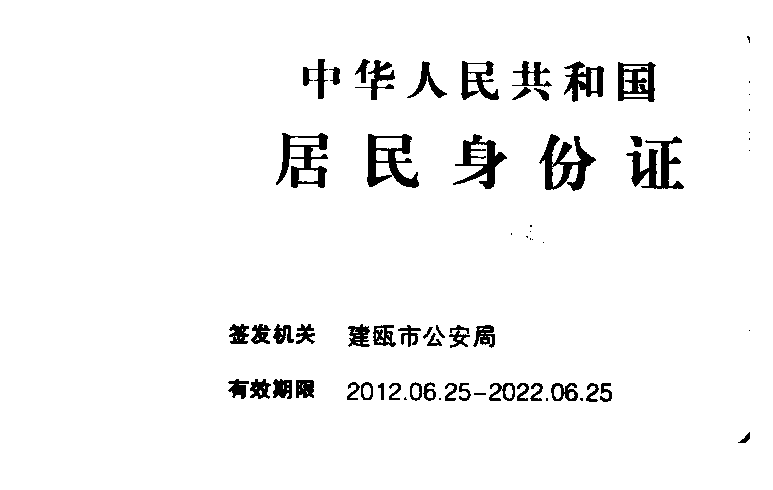

中华人民共和国
居 民身份证

签发机关 建瓯市公安局
害效戴隔 2012.06.25-2O22.06'25


In [12]:
## 图像腐蚀
kernel = np.ones((3,3),np.uint8)    
erosion = cv2.erode(imagebin,kernel,iterations = 1)  
plt.imshow(erosion,cmap=plt.cm.gray)
plt.axis("off")
plt.show()
## 再次通过pytesseract库来查看检测效果，但是结果并不是很好
text = pytesseract.image_to_string(erosion,lang='chi_sim')
print(text)

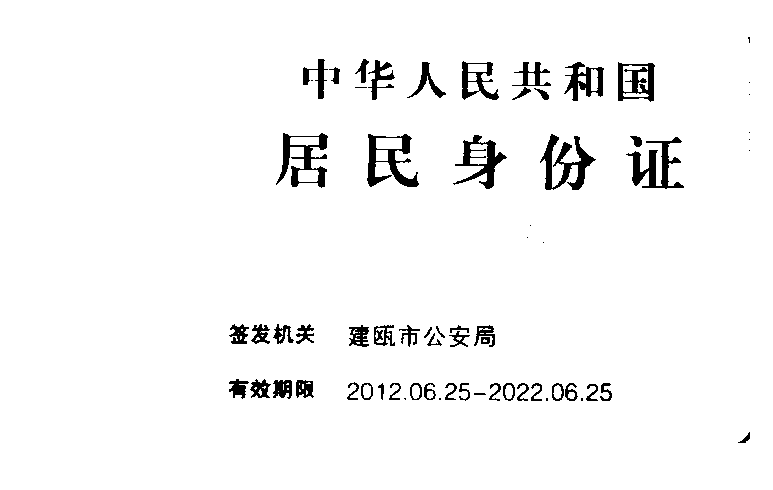

中华人民共和国
居 民身份证

签发机关 建瓯市公安局
有效期限 2012.O6'25-2O22.06.25


In [13]:
## 图像膨胀
dilation = cv2.dilate(erosion,kernel,iterations = 1) 
plt.imshow(dilation,cmap=plt.cm.gray)
plt.axis("off")
plt.show()
## 再次通过pytesseract库来查看检测效果，但是结果并不是很好
text = pytesseract.image_to_string(dilation,lang='chi_sim')
print(text)

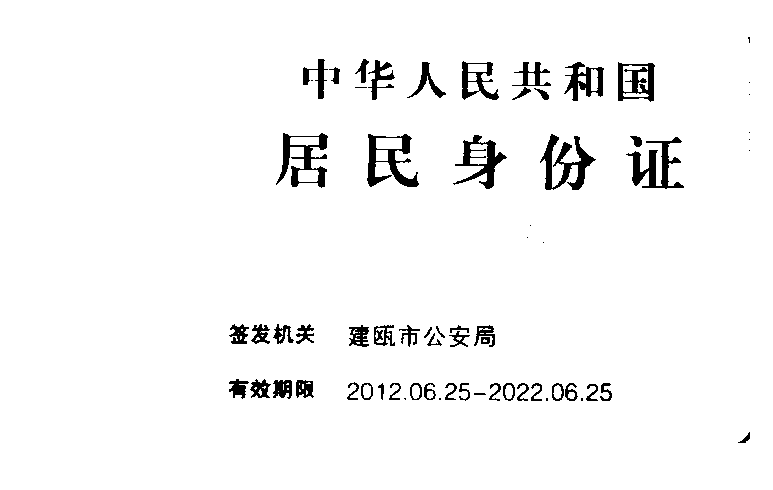

中华人民共和国
居 民身份证

签发机关 建瓯市公安局
有效期限 2012.O6'25-2O22.06.25


In [14]:
## 图像开运算 先进性腐蚀再进行膨胀
opening = cv2.morphologyEx(imagebin, cv2.MORPH_OPEN, kernel)  
plt.imshow(opening,cmap=plt.cm.gray)
plt.axis("off")
plt.show()
## 再次通过pytesseract库来查看检测效果，但是结果并不是很好
text = pytesseract.image_to_string(opening,lang='chi_sim')
print(text)

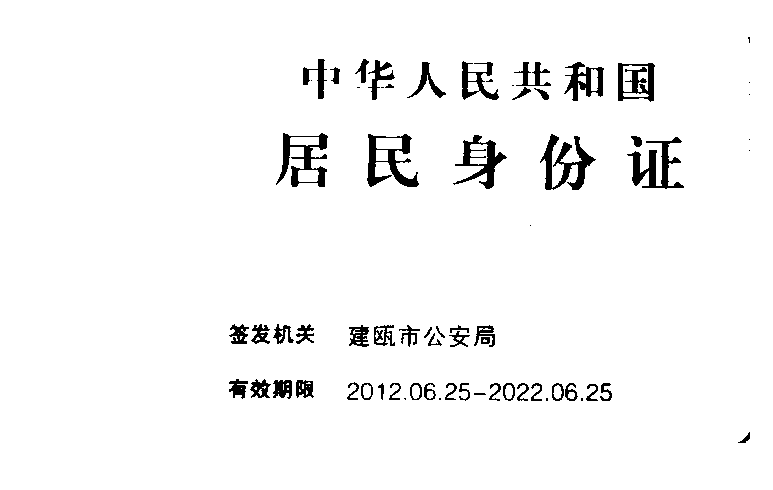

中华人民共和国
居民身份证

签发机关 建瓯市公安局
有效期陨 2012.O6.25-2O22.06.25


In [15]:
## 图像闭运算，先膨胀再腐蚀
closing = cv2.morphologyEx(imagebin, cv2.MORPH_CLOSE, kernel)  
plt.imshow(closing,cmap=plt.cm.gray)
plt.axis("off")
plt.show()
## 再次通过pytesseract库来查看检测效果，但是结果并不是很好
text = pytesseract.image_to_string(closing,lang='chi_sim')
print(text)

综合比较，如果只使用单个通道（R）通道，这样在0和O的识别上出错的可能性更大。